# Training Models

优化方法

* 解方程
* 梯度下降

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## 线性回归

### 标准方程Normal Equation

$$MSE(X, h_\theta) = \frac{1}{m} \sum{(\theta^T \cdot X^{(i)} - y^{(i)})^2}$$

$$\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

* $\hat{\theta}$是使成本函数最小的$\theta$值
* $y$是包含$y^{1}到y^{(n)}$的目标值向量

In [18]:
X =  2 * np.random.rand(100, 1)
y = 4 + 3 * np.random.randn(100, 1)

In [19]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
X.shape, y.shape

((100, 1), (100, 1))

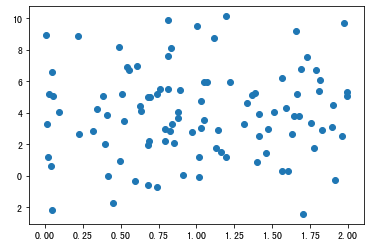

In [31]:
plt.scatter(X_b[:, 1], y)

In [23]:
theta_best

array([[3.70964803],
       [0.24469605]])

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([3.70964803]), array([[0.        , 0.24469605]]))

In [34]:
lin_reg.predict([[0, 2]])

array([[4.19904012]])

In [40]:
np.random.randn(2, 1)

array([[0.73089235],
       [0.13632734]])

## 梯度下降

### Stochastic Gradient Descent

In [42]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparamers

In [45]:
def learning_schedule(t):
    return t0 / (t + t1)

In [44]:
theta = np.random.randn(2, 1)   # random initialization

In [47]:
# for epoch in range(n_epochs):
#     for i in range(m):
#         random_index = np.random.randint(m)
#         xi = X_b[random_index:random_index+1]
#         yi = y[random_index:random_index+1]
#         gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
#         eta = learning_schedule(epoch*m+i)
#         theta = theta - eta * gradient

In [48]:
from sklearn.linear_model import SGDRegressor

In [53]:
sgd_reg = SGDRegressor(n_iter_no_change=50, eta0=0.1, penalty=None)

In [54]:
sgd_reg.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [58]:
X_poly = poly_features.fit_transform(X)

In [59]:
X[0]

array([1.66097327])

In [62]:
X_poly[0], X[0], X[0] ** 2

(array([1.66097327, 2.75883219]), array([1.66097327]), array([2.75883219]))

In [63]:
lin_reg = LinearRegression()

In [64]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lin_reg.intercept_, lin_reg.coef_

(array([3.7848132]), array([[0.02849882, 0.10655426]]))

## Decision Boundary

In [67]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [71]:
iris = datasets.load_iris()
X = iris.data[:,3:]
y = (iris['target'] == 2).astype(np.int)

In [72]:
X.shape, y.shape

((150, 1), (150,))

In [73]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [92]:
X_new.shape, y_prob.shape

((1000, 1), (1000, 2))

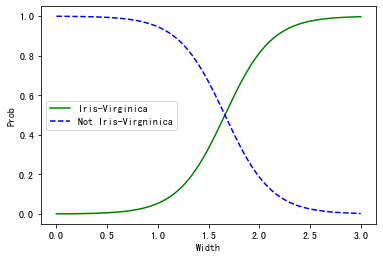

In [99]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virgninica')
plt.xlabel('Width')
plt.ylabel('Prob')
plt.legend(loc='center left')